<h1>Extracting Stock Data Using a Python Library</h1>

A company's stock share is a piece of the company more precisely:

**A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." <a href="https://www.investopedia.com/terms/s/stock.asp">[1]</a>**

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock **ticker** is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the `yfinance` library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.


## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
    </ul>

In [1]:
!pip install yfinance

  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=acdc47a932566c24c161ca9cfb737240cfafd79150703cb6c1ea974623f3cbc8
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

### stock info
Using the attribute `info` we can extract information about the stock as a Python dictionary.

In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country

In [5]:
apple_info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the `history()` method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [6]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600,0.0,0.0
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800,0.0,0.0
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000,0.0,0.0
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600,0.0,0.0
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [8]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

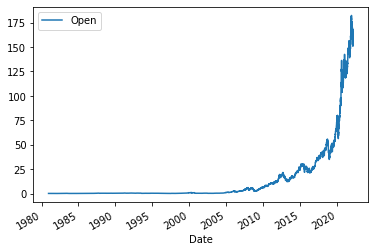

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the `history` function.

In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

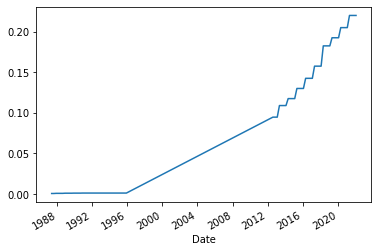

In [11]:
apple.dividends.plot()

Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.

In [12]:
amd = yf.Ticker("AMD")
info = amd.info

 Use the key  <code>'country'</code> to find the country the stock belongs to

In [13]:
info['country']

'United States'

 Use the key  <code>'sector'</code> to find the sector the stock belongs to

In [14]:
info['sector']

'Technology'

Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).

In [15]:
history = amd.history(pireod='max')
history.reset_index(inplace=True)
history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-02-16,119.050003,119.540001,114.220001,117.690002,119109600,0,0
1,2022-02-17,116.260002,116.980003,112.260002,112.370003,98179600,0,0
2,2022-02-18,113.900002,115.639999,109.889999,113.830002,114321200,0,0
3,2022-02-22,115.269997,119.199997,113.610001,115.650002,141648500,0,0
4,2022-02-23,117.400002,118.650002,109.040001,109.760002,120299400,0,0


In [16]:
history.Volume[0]

119109600

# Extracting Stock Data Using Web Scraping

Not all stock data is available via API in this assignment; you will use web-scraping to obtain financial data.
Using `beautiful soup` we will extract historical share data from a web-page.

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Downloading the Webpage Using Requests Library</li>
        <li>Parsing Webpage HTML Using BeautifulSoup</li>
        <li>Extracting Data and Building DataFrame</li>
    </ul>
</div>


In [17]:
import pandas as pd

from bs4 import BeautifulSoup
import requests

First we must use the `request` library to downlaod the webpage, and extract the text. We will extract Netflix stock data from this<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"> <b>Link</b></a>.

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

Next we must parse the text into html using `beautiful_soup`

In [19]:
soup = BeautifulSoup(data, 'html5lib')
print(soup.title.text)

Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance


Now we can turn the html table into a pandas dataframe


In [20]:
table = soup.find_all('table')
len(table)

1

In [21]:
population_data_read_html = pd.read_html(str(table), flavor='bs4')[0]
population_data_read_html.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


### other example

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')
print(soup.title.text)

Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance


In [23]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
    
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85
